# Lab 8, 22.04

Goal for today: learn minimal set of skills to work with pandas
0. How to read data to pandas
1. How to select data in pandas
2. How to modify existing data in pandas
3. How to delete data from pandas
4. How to join two data sources

Content based on https://github.com/DELabUW/szkola-letnia-2015/

<img src="https://imgs.xkcd.com/comics/query.png">

[Reminder from L5]

In [24]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Pandas

Content more or less copied from last year course https://github.com/gmum/python-lecture/blob/master/Pandas-1.ipynb

**pandas** is an open source, BSD-licensed library providing 

+ high-performance, easy-to-use data structures and 

+ data analysis tools for the Python programming language.

## Intro to data structures

### Series

+ [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). 


+ The axis labels are collectively referred to as the index. 


+ The basic method to create a Series is to call:

In [10]:
from pandas import Series

In [11]:
import numpy as np
from pandas import Series, DataFrame

s = Series(np.random.randn(5), index=['a', 'b', 'c', 'i', 'e'])
s

a   -0.807534
b    0.682654
c    0.096363
i   -0.432473
e    0.170124
dtype: float64

#### Series is `dict`-like

In [12]:
s['a']

-0.8075341532832826

In [13]:
s + s # Works!

a   -1.615068
b    1.365308
c    0.192725
i   -0.864947
e    0.340249
dtype: float64

In [14]:
s[1:] + s # Wow! Take home message: series is like adding np.arrays but with index book-keeping

a         NaN
b    1.365308
c    0.192725
e    0.340249
i   -0.864947
dtype: float64

## Dataframe

<img src="img/data_frame.png">

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

+ `Dict` of 1D `ndarrays`, `lists`, `dicts`, or Series
+ 2-D `numpy.ndarray`
+ Structured or record `ndarray`
+ A Series
+ Another DataFrame

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. 

If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame.

Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [17]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}
DataFrame(d)

,one,two
0,1,4
1,2,3
2,3,2
3,4,1


In [18]:
d = {'one' : Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

df = DataFrame(d)
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


In [19]:
data2 = [{"a": 5}, {'a': 1, 'b': 2}, 
         {'a': 5, 'b': 10, 'c': 20}]
x = DataFrame(data2)
x

,a,b,c
0,5,NaN,NaN
1,1,2,NaN
2,5,10,20


## There are some cool functions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c37b610>]], dtype=object)

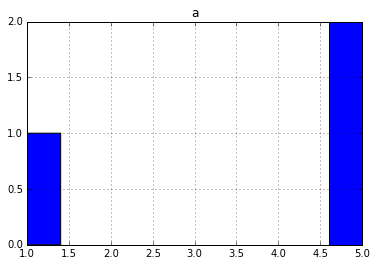

In [25]:
x.hist("a")

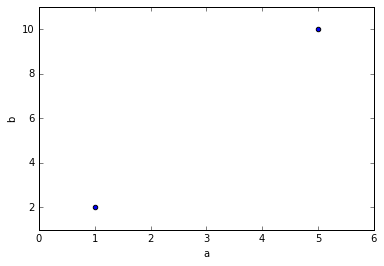

In [26]:
x.plot(kind="scatter", x="a", y="b")

# Airports.. again

# Pandas skill 0 - I/O

In [80]:
airports = pd.read_csv("data/airports.csv", header=None)

In [82]:
airports.loc[0:10].to_latex() # This can be excel file, markdown, html, and more

u'\\begin{tabular}{lrlllllrrrrll}\n\\toprule\n{} &  0  &                          1  &            2  &                3  &   4  &    5  &         6  &          7  &    8  &  9  & 10 &                    11 \\\\\n\\midrule\n0  &   1 &                      Goroka &        Goroka &  Papua New Guinea &  GKA &  AYGA &  -6.081689 &  145.391881 &  5282 &  10 &  U &  Pacific/Port\\_Moresby \\\\\n1  &   2 &                      Madang &        Madang &  Papua New Guinea &  MAG &  AYMD &  -5.207083 &  145.788700 &    20 &  10 &  U &  Pacific/Port\\_Moresby \\\\\n2  &   3 &                 Mount Hagen &   Mount Hagen &  Papua New Guinea &  HGU &  AYMH &  -5.826789 &  144.295861 &  5388 &  10 &  U &  Pacific/Port\\_Moresby \\\\\n3  &   4 &                      Nadzab &        Nadzab &  Papua New Guinea &  LAE &  AYNZ &  -6.569828 &  146.726242 &   239 &  10 &  U &  Pacific/Port\\_Moresby \\\\\n4  &   5 &  Port Moresby Jacksons Intl &  Port Moresby &  Papua New Guinea &  POM &  AYPY &  -9.443383 & 

In [84]:
airports.loc[0:10].to_html()

u'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n      <th>3</th>\n      <th>4</th>\n      <th>5</th>\n      <th>6</th>\n      <th>7</th>\n      <th>8</th>\n      <th>9</th>\n      <th>10</th>\n      <th>11</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>Goroka</td>\n      <td>Goroka</td>\n      <td>Papua New Guinea</td>\n      <td>GKA</td>\n      <td>AYGA</td>\n      <td>-6.081689</td>\n      <td>145.391881</td>\n      <td>5282</td>\n      <td>10</td>\n      <td>U</td>\n      <td>Pacific/Port_Moresby</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>Madang</td>\n      <td>Madang</td>\n      <td>Papua New Guinea</td>\n      <td>MAG</td>\n      <td>AYMD</td>\n      <td>-5.207083</td>\n      <td>145.788700</td>\n      <td>20</td>\n      <td>10</td>\n      <td>U</td>\n      <td>Pacific/Port_Moresby</td>\n    </

## Pandas skill 1 - selecting

In [28]:
airports = pd.read_csv("data/airports.csv", header=None)
airports.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10,U,Pacific/Port_Moresby


In [29]:
airports.columns = ["Airport ID", "Name", "City", "Country", "IATA/FAA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone"]
airports.head()

,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10,U,Pacific/Port_Moresby


In [31]:
airports2 = pd.read_csv("data/airports.csv", header=None, index_col=0)
airports2.columns = ["Name", "City", "Country", "IATA/FAA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database time zone"]
airports2.index.name = "Airport ID"
airports2.head()

,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone
Airport ID,,,,,,,,,,,
1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10,U,Pacific/Port_Moresby
3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10,U,Pacific/Port_Moresby


# Exercise 1 [how to quickly process data from csv file], 2 points

* Select last 10 airports (using airports.loc)
* Select last 10 airports from airports2 (now you have to use iloc)
* Select all airports from 1st Timezone (airports['Timezone'] == 0 return True False vector)
* Select all Polish airports

## Pandas skill 2 - modifying 

In [32]:
airports["Timezone 0"] = airports["Timezone"] + 1
airports.head()

,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Timezone 0
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby,11
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10,U,Pacific/Port_Moresby,11
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby,11
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby,11
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10,U,Pacific/Port_Moresby,11


# Exercise 2, 1 point

* Convert latitude from feets to meters and write as new column (Altitude_meters)

In [33]:
# Simple statistics
airports.describe()

,Airport ID,Latitude,Longitude,Altitude,Timezone,Timezone 0
count,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000,8107.000000
mean,4766.361046,26.817720,-3.921969,933.449365,0.169236,1.169236
std,2943.205193,27.866953,85.900873,1624.740899,5.737326,5.737326
min,1.000000,-89.999997,-179.877000,-1266.000000,-12.000000,-11.000000
25%,2091.500000,8.824928,-79.022498,38.000000,-5.000000,-4.000000
50%,4257.000000,34.987800,5.292028,272.000000,1.000000,2.000000
75%,7508.500000,47.957599,49.785821,1020.000000,4.000000,5.000000
max,9541.000000,82.517778,179.951000,14472.000000,13.000000,14.000000


## Pandas skill 3 - statistics

In [34]:
airports.count()

Airport ID               8107
Name                     8107
City                     8107
Country                  8107
IATA/FAA                 5880
ICAO                     8043
Latitude                 8107
Longitude                8107
Altitude                 8107
Timezone                 8107
DST                      8107
Tz database time zone    8107
Timezone 0               8107
dtype: int64

In [35]:
airports.mean()

Airport ID    4766.361046
Latitude        26.817720
Longitude       -3.921969
Altitude       933.449365
Timezone         0.169236
Timezone 0       1.169236
dtype: float64

In [41]:
len(airports["Country"].unique())

240

In [42]:
airports["Country"].value_counts().head()

United States    1697
Canada            435
Germany           321
Australia         263
Russia            249
Name: Country, dtype: int64

In [36]:
airports["Altitude"].min(), airports["Altitude"].mean(), airports["Altitude"].max()

(-1266, 933.4493647465154, 14472)

In [37]:
airports[airports["Altitude"] == airports["Altitude"].min()]

,Airport ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Timezone 0
1573,1600,I Bar Yehuda,Metzada,Israel,NaN,LLMZ,31.328169,35.388608,-1266,2,U,Asia/Jerusalem,3


## Pandas skill 2 - modifying

In [40]:
airports1 = airports.drop(1573)
airports1["Altitude"].min(), airports1["Altitude"].mean(), airports1["Altitude"].max()

(-164, 933.7207007155193, 14472)

## Pandas skill 4 - joining different sources of data

### Gluing together - concat (you can pick if glue horizontally or vertically)

Similar to appending to list

In [61]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3'],
                  'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']},
                      index=[0, 1, 2, 3])


df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [64]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                      'C': ['C4', 'C5', 'C6', 'C7']},
                     
                      index=[4, 5, 6, 7])
  

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                  'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                  index=[8, 9, 10, 11])


frames = [df1, df2, df3]

result = pd.concat(frames)

result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,NaN
5,A5,B5,C5,NaN
6,A6,B6,C6,NaN
7,A7,B7,C7,NaN
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [71]:
pd.concat(frames, join="inner", axis=0)

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3
4,A4,B4,C4
5,A5,B5,C5
6,A6,B6,C6
7,A7,B7,C7
8,A8,B8,C8
9,A9,B9,C9


## Merge

Like SQL (relational algebra)

In [44]:
areas = pd.read_csv("data/area.csv")
areas.head()

,Country Code,Country Name,Land area
0,AFG,Afghanistan,652230
1,ALB,Albania,27400
2,DZA,Algeria,2381740
3,ASM,American Samoa,200
4,AND,Andorra,470


In [45]:
s1 = areas["Land area"]
s1.index = areas["Country Name"]
s1 = pd.DataFrame(s1)
s1.head()

,Land area
Country Name,
Afghanistan,652230
Albania,27400
Algeria,2381740
American Samoa,200
Andorra,470


In [48]:
s2 = airports["Country"].value_counts()
s2.name = "Number of airports"
s2 = pd.DataFrame(s2)
s2.head()

,Number of airports
United States,1697
Canada,435
Germany,321
Australia,263
Russia,249


In [73]:
# We have to decide what are the rules to create new row
pd.merge(s1, s2, right_index=True, left_index=True).head()

,Land area,Number of airports
United States,9147420,1697
Canada,9093510,435
Germany,348610,321
Australia,7682300,263
France,547660,233


In [74]:
# Another example

left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})
    

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                         'D': ['D0', 'D1', 'D2', 'D3']})
   

result = pd.merge(left, right, on='key')

In [75]:
left

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K2
3,A3,B3,K3


In [76]:
right

,C,D,key
0,C0,D0,K0
1,C1,D1,K1
2,C2,D2,K2
3,C3,D3,K3


In [77]:
result

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                  'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
  

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                          'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})
   

result = pd.merge(left, right, on=['key1', 'key2'])

# Exercise 3, 2 points

* Read in airports.csv
* Read in routes.csv
* Merge them to get columns 
    * Airline
    * Source airport
    * Source country
    * Destination airport
    * Destination country
    
This should look like this: <img src="img/output_ex3.png">